# LAB 1 - Génération pseudo aléatoire


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

## Exercice 1


In [2]:
def generateur(X0=1, A=43, B=0, m=2048, size=1000):
    list = [X0]
    for _ in range(size):
        list.append((list[-1] * A + B) % m)
    generated = [x / m for x in list]
    return generated

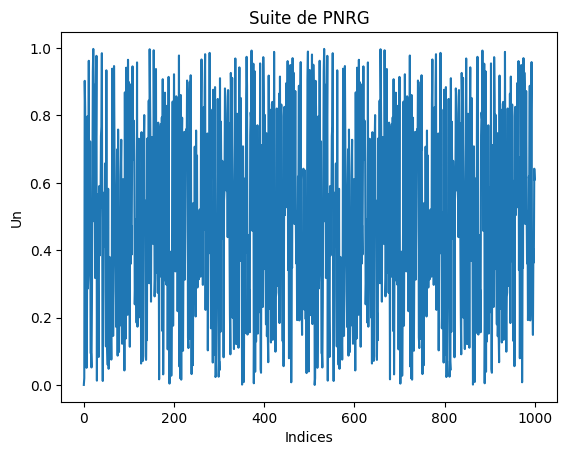

In [3]:
m = generateur()
plt.plot(m)
plt.xlabel("Indices")
plt.ylabel("Un")
plt.title("Suite de PNRG")
plt.show()

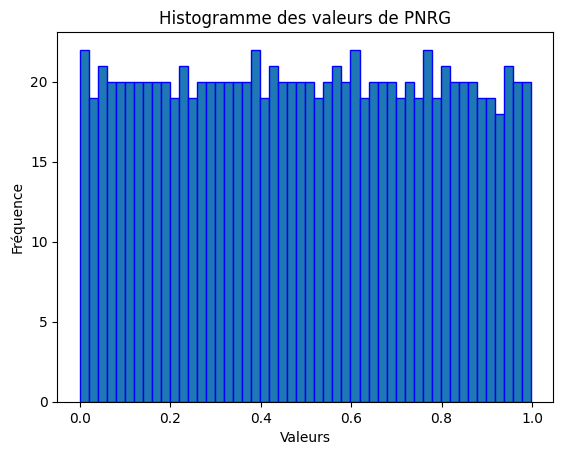

In [4]:
plt.hist(m, bins=50, edgecolor="b")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.title("Histogramme des valeurs de PNRG")
plt.show()

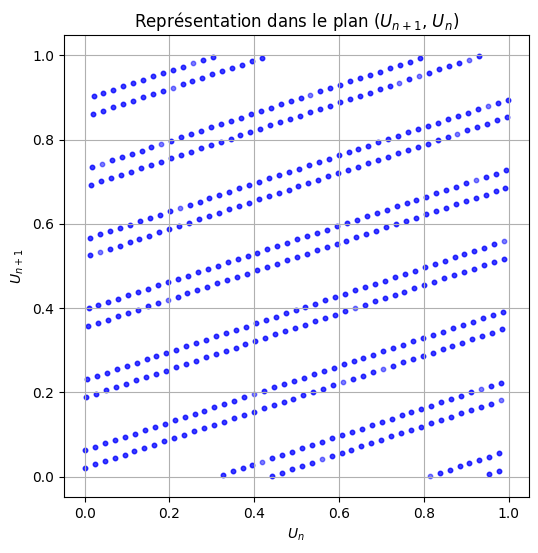

In [5]:
Un = m[:-1]
Un1 = m[1:]

plt.figure(figsize=(6, 6))
plt.scatter(Un, Un1, s=10, c="blue", alpha=0.5)
plt.title("Représentation dans le plan ($U_{n+1}$, $U_n$)")
plt.xlabel("$U_n$")
plt.ylabel("$U_{n+1}$")
plt.grid(True)
plt.show()

In [6]:
m = generateur(1, 1664525, 1013904223, math.pow(2, 32), 1000)

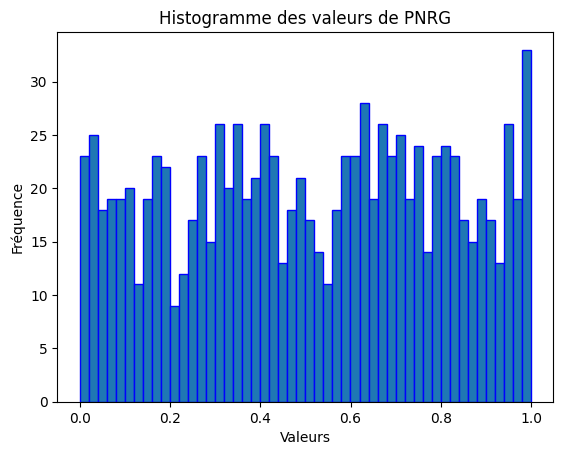

In [7]:
plt.hist(m, bins=50, edgecolor="b")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.title("Histogramme des valeurs de PNRG")
plt.show()

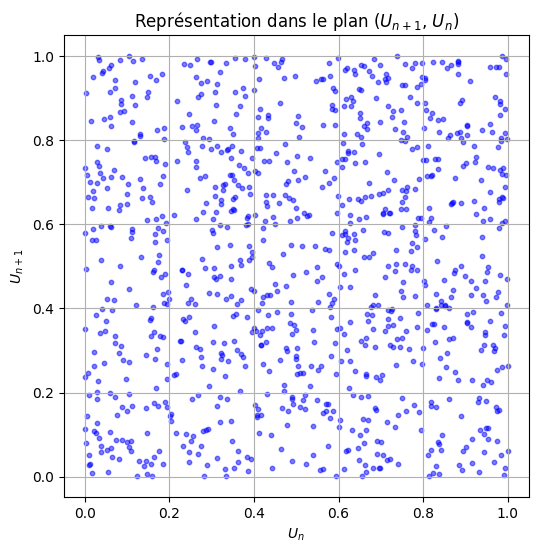

In [8]:
Un = m[:-1]
Un1 = m[1:]

plt.figure(figsize=(6, 6))
plt.scatter(Un, Un1, s=10, c="blue", alpha=0.5)
plt.title("Représentation dans le plan ($U_{n+1}$, $U_n$)")
plt.xlabel("$U_n$")
plt.ylabel("$U_{n+1}$")
plt.grid(True)
plt.show()

## Exercice 2


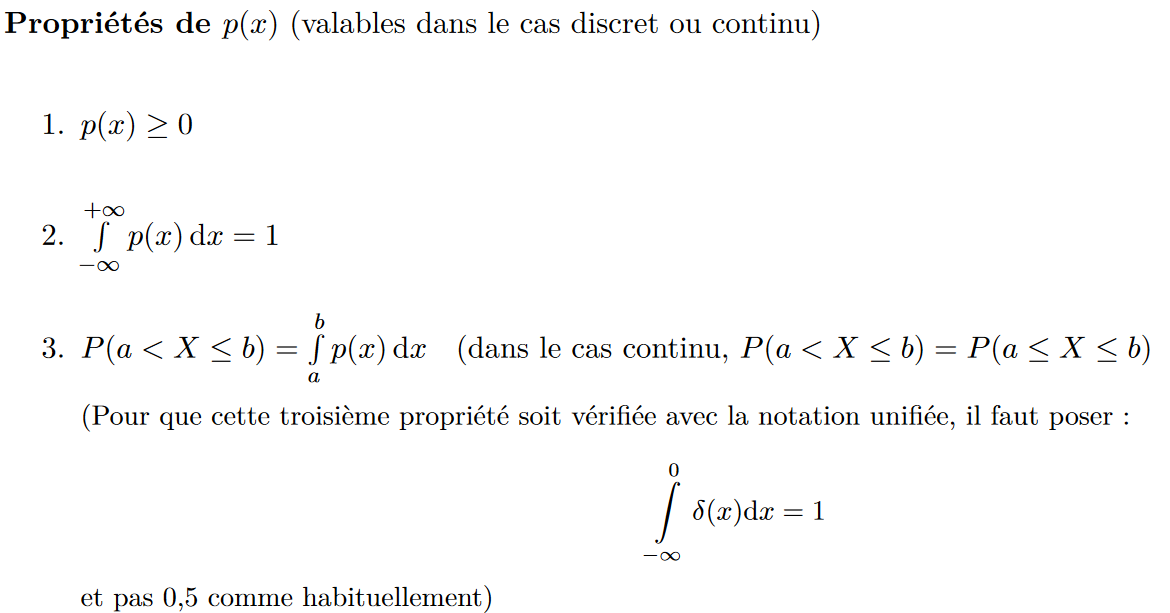


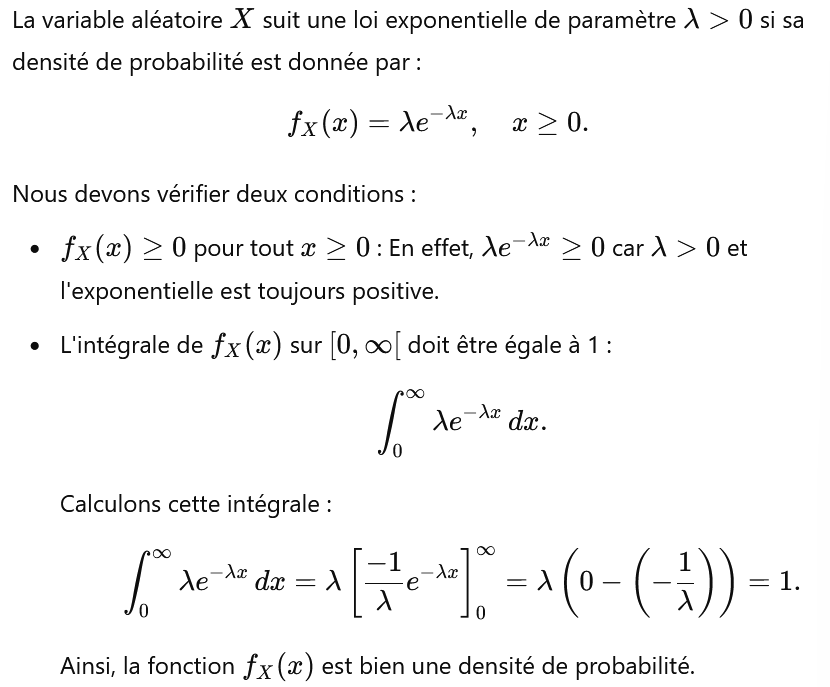


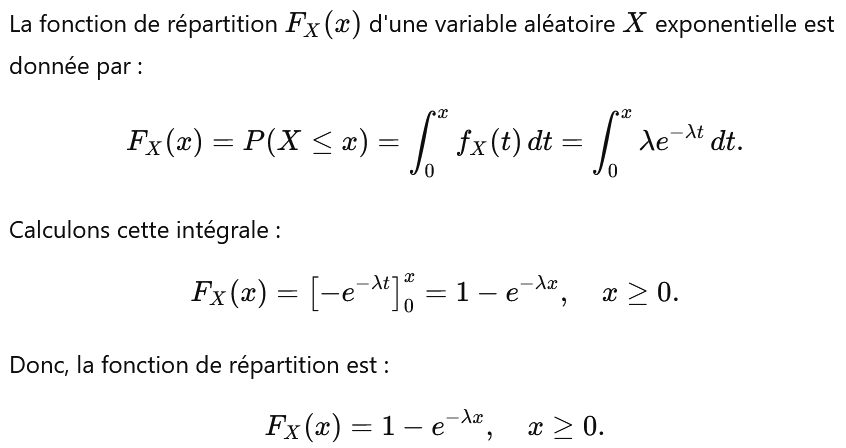


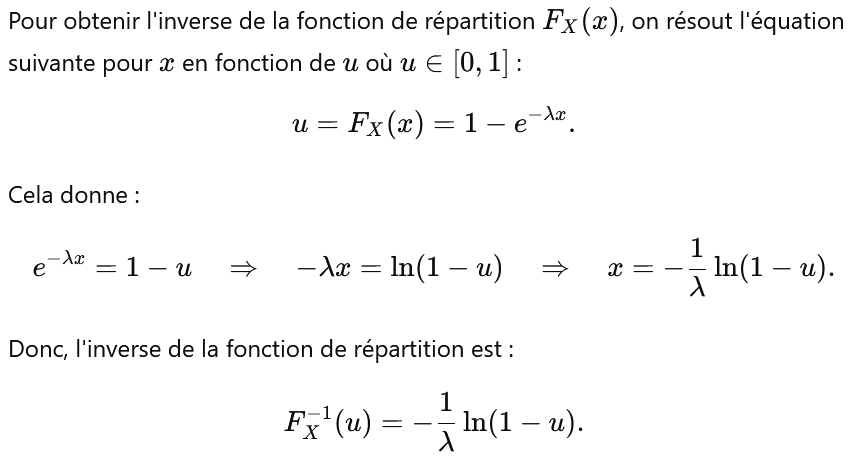


In [9]:
def simulate_exponential(n, lambda_):
    U = np.random.uniform(0, 1, n)  # Génère n échantillons de U ~ U(0, 1)
    X = -np.log(1 - U) / lambda_  # Inversion de la fonction de répartition
    return X


n_samples = 1000
lambda_ = 2
samples = simulate_exponential(n_samples, lambda_)

# Exercice 3


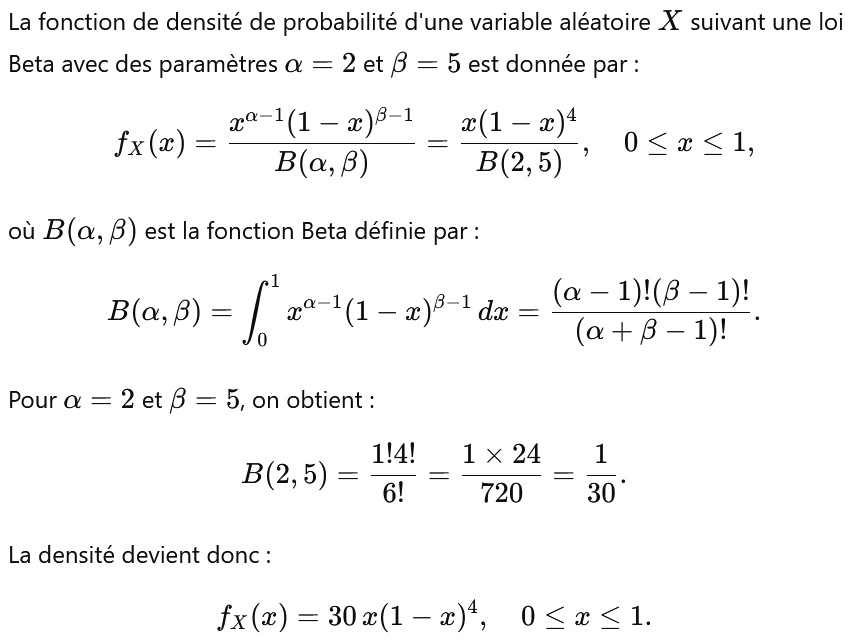


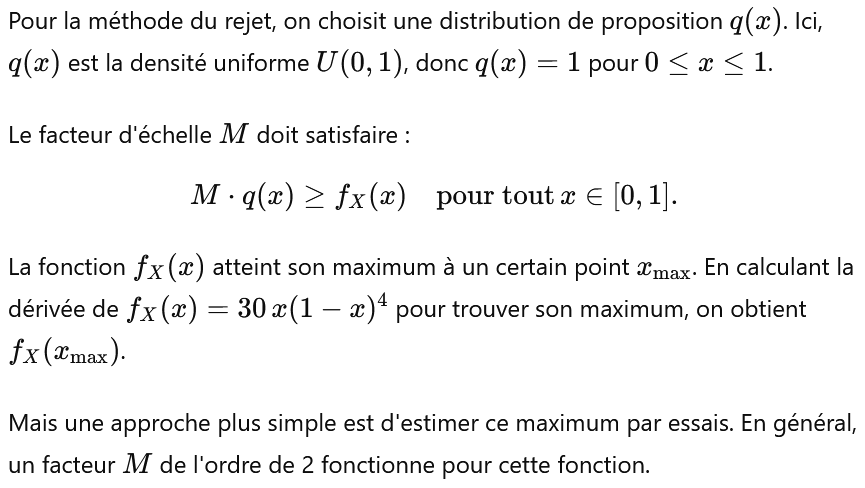


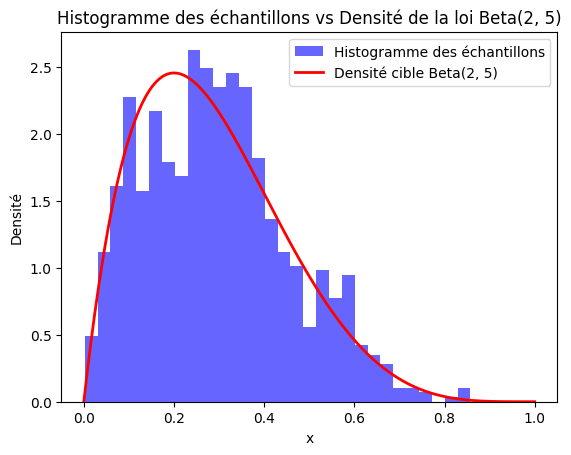

In [10]:
# Densité de la loi Beta(2, 5)
def beta_density(x):
    return 30 * x * (1 - x) ** 4


# Méthode du rejet pour la loi Beta(2, 5)
def rejection_sampling_beta(n, M):
    samples = []
    while len(samples) < n:
        u = np.random.uniform(0, 1)  # échantillon de la loi U(0, 1)
        v = np.random.uniform(0, 1)  # échantillon pour décider l'acceptation
        if v <= beta_density(u) / M:
            samples.append(u)
    return np.array(samples)


# Nombre d'échantillons et facteur M
n_samples = 1000
M = 2  # Facteur d'échelle

# Génération des échantillons
samples = rejection_sampling_beta(n_samples, M)

# Tracé de l'histogramme et de la densité cible
x_vals = np.linspace(0, 1, 1000)
beta_vals = beta_density(x_vals)

plt.hist(
    samples,
    bins=30,
    density=True,
    alpha=0.6,
    color="b",
    label="Histogramme des échantillons",
)
plt.plot(x_vals, beta_vals, "r-", lw=2, label="Densité cible Beta(2, 5)")
plt.title("Histogramme des échantillons vs Densité de la loi Beta(2, 5)")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.show()

Ce code implémente la méthode du rejet pour simuler n=1000 échantillons de la distribution Beta avec les paramètres α=2 et β=5. Il utilise la densité uniforme U(0,1) comme distribution de proposition et un facteur d'échelle M=2.

L'histogramme des échantillons obtenus est ensuite comparé à la densité cible de la loi Beta(2, 5). Vous devriez observer que l'histogramme suit bien la forme de la densité cible.


# Exercice 4


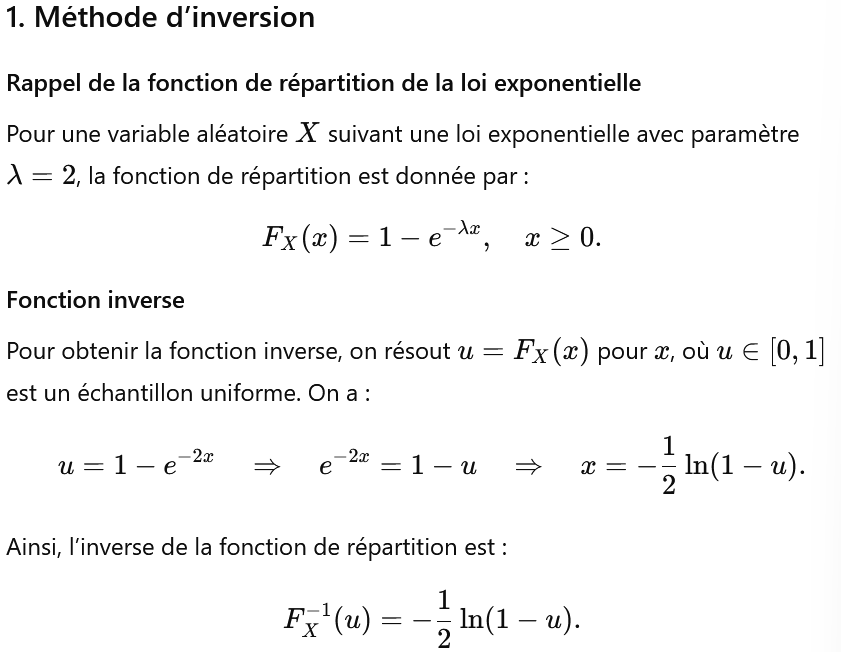


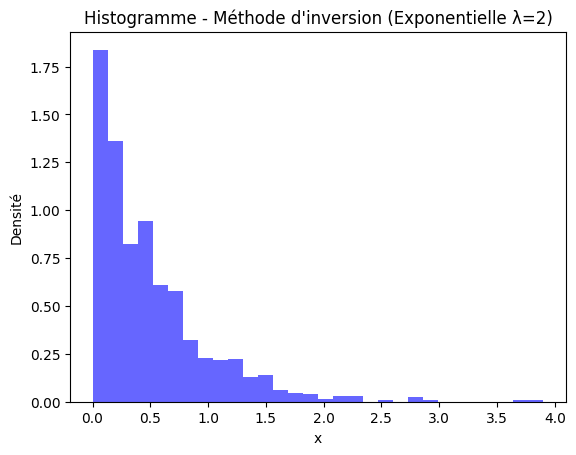

In [11]:
# Méthode d'inversion pour générer des échantillons exponentiels
def inversion_exponential(n, lambda_):
    U = np.random.uniform(0, 1, n)  # Génère des échantillons uniformes U(0, 1)
    X = -np.log(1 - U) / lambda_  # Inverse de la fonction de répartition
    return X


# Générer 1000 échantillons exponentiels avec λ = 2
lambda_ = 2
n_samples = 1000
samples_inversion = inversion_exponential(n_samples, lambda_)

# Histogramme pour la méthode d'inversion
plt.hist(
    samples_inversion,
    bins=30,
    density=True,
    alpha=0.6,
    color="b",
    label="Méthode d'inversion",
)
plt.title("Histogramme - Méthode d'inversion (Exponentielle λ=2)")
plt.xlabel("x")
plt.ylabel("Densité")
plt.show()

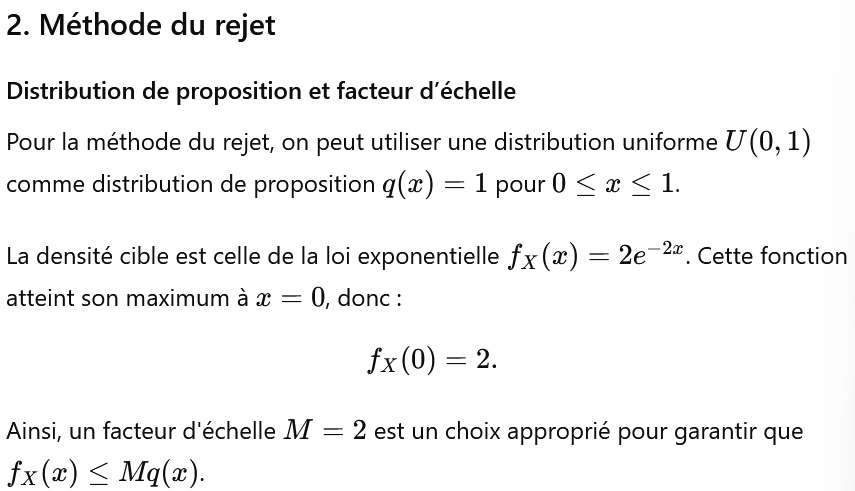


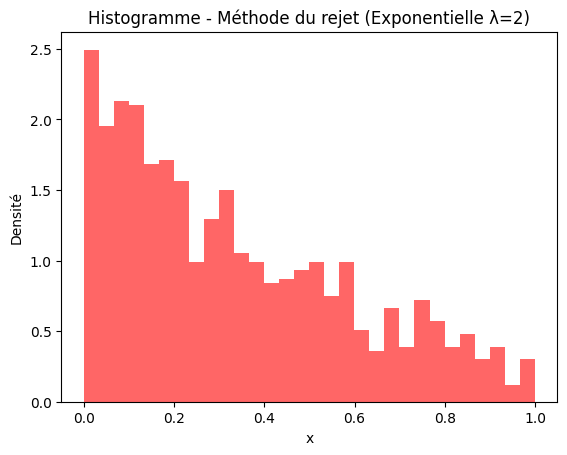

In [12]:
# Méthode du rejet pour générer des échantillons exponentiels
def rejection_sampling_exponential(n, lambda_, M):
    samples = []
    while len(samples) < n:
        u = np.random.uniform(0, 1)  # échantillon de U(0, 1)
        v = np.random.uniform(0, 1)  # échantillon pour décider l'acceptation
        if v <= 2 * np.exp(-2 * u) / M:  # Comparer à f_X(x) / M
            samples.append(u)
    return np.array(samples)


# Générer 1000 échantillons avec la méthode du rejet
samples_rejection = rejection_sampling_exponential(n_samples, lambda_, M=2)

# Histogramme pour la méthode du rejet
plt.hist(
    samples_rejection,
    bins=30,
    density=True,
    alpha=0.6,
    color="r",
    label="Méthode du rejet",
)
plt.title("Histogramme - Méthode du rejet (Exponentielle λ=2)")
plt.xlabel("x")
plt.ylabel("Densité")
plt.show()

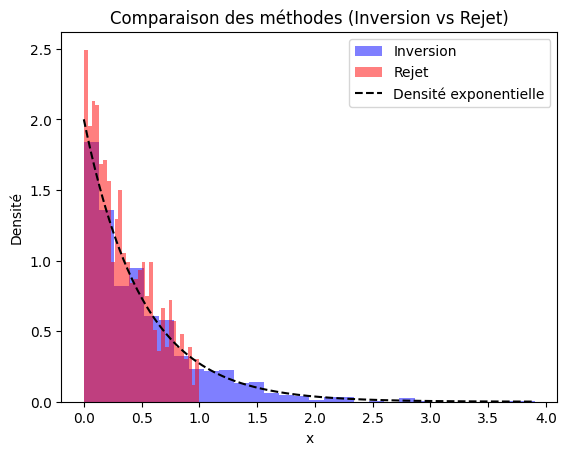

In [13]:
# Histogrammes des deux méthodes
plt.hist(
    samples_inversion, bins=30, density=True, alpha=0.5, color="b", label="Inversion"
)
plt.hist(samples_rejection, bins=30, density=True, alpha=0.5, color="r", label="Rejet")
x_vals = np.linspace(0, max(samples_inversion), 1000)
plt.plot(
    x_vals, lambda_ * np.exp(-lambda_ * x_vals), "k--", label="Densité exponentielle"
)
plt.title("Comparaison des méthodes (Inversion vs Rejet)")
plt.xlabel("x")
plt.ylabel("Densité")
plt.legend()
plt.show()

Méthode d'inversion :

- Efficacité : La méthode d'inversion est directe, car elle ne nécessite qu'une seule transformation par échantillon (tirer un uniforme et appliquer la fonction inverse). C'est donc une méthode très efficace en termes de temps de calcul.
- Précision : Cette méthode est aussi très précise puisqu'elle utilise directement la fonction inverse exacte.

Méthode du rejet :

- Efficacité : La méthode du rejet est moins efficace que la méthode d'inversion. En effet, elle repose sur l'acceptation/rejet de nombreux échantillons, ce qui peut entraîner des pertes de temps, surtout si le facteur MM est mal choisi ou si beaucoup d'échantillons sont rejetés.
- Précision : La précision est comparable à celle de la méthode d'inversion, mais elle dépend du bon choix du facteur MM et de la qualité de la distribution de proposition.


# Exercice 5


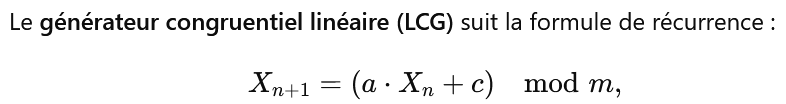


In [14]:
# Générateur congruentiel linéaire (LCG)
def LCG(a, c, m, X0, n):
    X = np.zeros(n)
    X[0] = X0
    for i in range(1, n):
        X[i] = (a * X[i - 1] + c) % m
    return X / m  # Normaliser pour avoir des valeurs dans [0, 1]


# Paramètres LCG
a = 1103515245
c = 12345
m = 2**31
X0 = 42
n_samples = 10000

# Générer 10 000 nombres pseudo-aléatoires avec LCG
lcg_samples = LCG(a, c, m, X0, n_samples)

In [15]:
# Générer 10 000 nombres pseudo-aléatoires avec Mersenne Twister
mt_samples = np.random.random(n_samples)

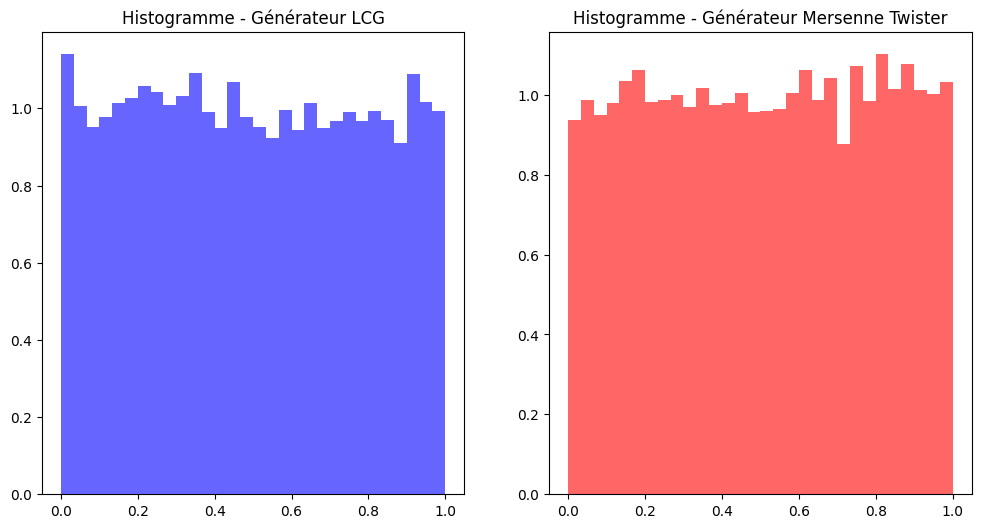

In [16]:
# Tracer les histogrammes des deux générateurs
plt.figure(figsize=(12, 6))

# Histogramme du LCG
plt.subplot(1, 2, 1)
plt.hist(lcg_samples, bins=30, density=True, alpha=0.6, color="b")
plt.title("Histogramme - Générateur LCG")

# Histogramme du Mersenne Twister
plt.subplot(1, 2, 2)
plt.hist(mt_samples, bins=30, density=True, alpha=0.6, color="r")
plt.title("Histogramme - Générateur Mersenne Twister")

plt.show()

In [17]:
# Test KS pour le LCG
ks_lcg = stats.kstest(lcg_samples, "uniform")

# Test KS pour le Mersenne Twister
ks_mt = stats.kstest(mt_samples, "uniform")

print("Test KS pour LCG:", ks_lcg)
print("Test KS pour Mersenne Twister:", ks_mt)

Test KS pour LCG: KstestResult(statistic=np.float64(0.01216830844879152), pvalue=np.float64(0.10264419863973051), statistic_location=np.float64(0.4690316915512085), statistic_sign=np.int8(1))
Test KS pour Mersenne Twister: KstestResult(statistic=np.float64(0.010218134496175812), pvalue=np.float64(0.24567709571598018), statistic_location=np.float64(0.7380181344961758), statistic_sign=np.int8(-1))


- Période du LCG : La période d'un générateur congruentiel linéaire est au maximum mm, donc pour le LCG avec m=231m=231, la période maximale est 231231. Cependant, en pratique, la période est souvent plus petite si les paramètres aa, cc, et mm ne sont pas choisis de manière optimale.

- Période du Mersenne Twister : Le Mersenne Twister a une période beaucoup plus longue, de l'ordre de 219937−1219937−1. Cela signifie qu'il peut générer une séquence extrêmement longue avant de commencer à se répéter.


Impact potentiel :

- Dans des applications nécessitant des longues séquences pseudo-aléatoires, comme la simulation de Monte-Carlo, un générateur avec une longue période est essentiel pour éviter des cycles répétitifs. Le Mersenne Twister est donc souvent préféré pour ces tâches en raison de sa période extrêmement longue.
- Le LCG est plus simple et rapide, mais il est plus sujet à des cycles courts et peut avoir des corrélations indésirables dans certaines applications.


# Exercice 6


In [18]:
# PYTHON
np.random.seed(42)  # Fixer la graine
samples_python = np.random.uniform(0, 1, 1000)

# R
# set.seed(42)  # Fixer la graine
# samples_r <- runif(1000, min=0, max=1)